In [545]:
import numpy as np
from typing import * 
import matplotlib.pyplot as plt

from numpy import pi, sin, e

alpha = 1
beta = 1

u_0 = 0
u_1 = 0

n = 100

example_1 = dict(
    alpha = 1, 
    beta = 1, 
    f = lambda x: -2*alpha + beta*x*(x-1),
    range = [0, 1],
    u_0 = 0,
    u_1 = 0,
    n = n
)

example_2 = dict(
    alpha = 1, 
    beta = 1, 
    f = lambda x: alpha*pi**2*sin(pi*x) + beta*sin(pi*x),
    range = [0, 1],
    u_0 = 0,
    u_1 = 0,
    n = n
)

example_3 = dict(
        alpha = 1,
        beta = 0, 
        range = [0, 1],
        n = n,
        f = lambda h, x: 8*h * np.ones(len(x))
)

example_4 = dict(
    alpha = 1,
    beta = 1,
    range = [0, 1],
    n = n,
    f = lambda h, x: h*x
)

In [546]:
def plot(x: np.ndarray, u_k: np.ndarray, u_x: np.ndarray) -> None:
    """
    Args:
        x (np.ndarray): valores do domínio
        u_k (np.ndarray): valores calculados pelo método das diferenças finitas
        u_x (np.ndarray): valores reais da função nos pontos do domínio
    """
    plt.scatter(x, u_x, label="u(x)")
    plt.scatter(x, u_k, label="u_k")
    plt.legend()

    plt.show()

### Diferenças Finitas

In [547]:
def finite_difference(alpha: float, 
                      beta: float, 
                      f: Callable,
                      range: List,
                      u_0: float, 
                      u_1: float,
                      n: float) -> np.ndarray:
    """
    Args:
        alpha (float): parâmetro alpha das equações
        beta (float): parâmetro beta das equações
        f (Callable): função f das equações
        range (List): domínio do problema
        u_0 (float): valor u_0 de contorno (no ponto 0)
        u_1 (float): valor u_1 de contorno (no ponto 1)
        h (float): tamanho do passo

    Returns:
        np.ndarray: _description_
    """
    h = 1 / (n+1)
    x = np.arange(range[0] + h, range[1], h)

    diagonal = (2*alpha + beta*h**2) / h**2 * np.ones(n)
    lower_diagonal = -alpha/h**2 * np.ones(n-1)
    upper_diagonal = -alpha /h**2 * np.ones(n-1)
    
    A = np.diag(diagonal)
    A += np.diag(upper_diagonal, k=1)
    A += np.diag(lower_diagonal, k=-1)

    b = f(x)
    
    return x, np.linalg.solve(A, b)


def finite_difference_error(u: np.ndarray, u_k: np.ndarray):
    return np.linalg.norm(u - u_k) / np.linalg.norm(u)

### Exemplo 1

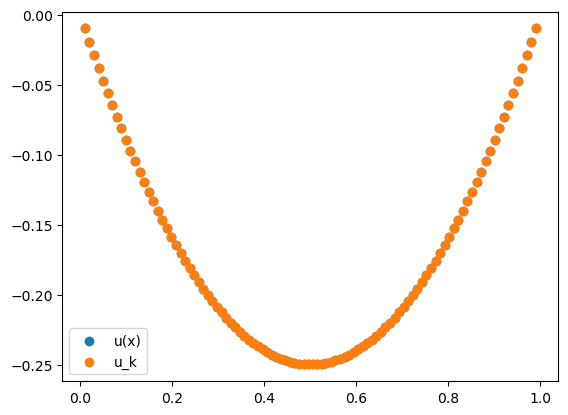

Erro: 3.3351656359529826e-13


In [548]:
def u(x):
    return x*(x-1)

x, u_k = finite_difference(**example_1)
u_x = u(x)
relative_error = finite_difference_error(u(x), u_k)


plot(x, u_k, u_x)
print(f"Erro: {relative_error}")

### Exemplo 2

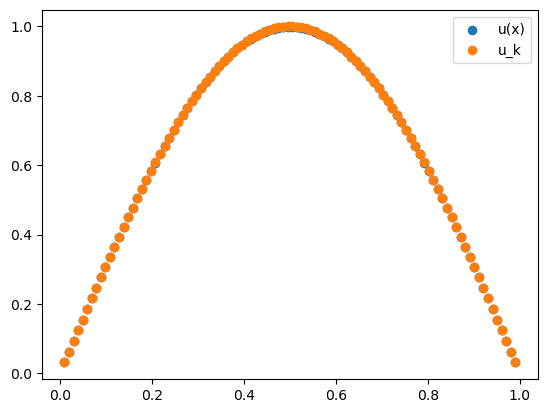

Erro: 7.321154111702462e-05


In [549]:
def u(x):
    return sin(pi*x)

x, u_k = finite_difference(**example_2)
u_x = u(x)
relative_error = finite_difference_error(u(x), u_k)


plot(x, u_k, u_x)
print(f"Erro: {relative_error}")

### Método de Galerkin

In [550]:
def galerkin(alpha: float,
             beta: float, 
             range: List,
             n: float,
             f: Callable) -> np.ndarray:
    h = 1 / (n+1)
    x = np.arange(range[0] + h, range[1], h)
    
    diagonal = 2*alpha/h + 2*beta*h/3 * np.ones(n)
    lower_diagonal = -alpha/h + beta*h/6 * np.ones(n-1)
    upper_diagonal = -alpha/h + beta*h/6 * np.ones(n-1)
    
    K = np.diag(diagonal)
    K += np.diag(upper_diagonal, k=1)
    K += np.diag(lower_diagonal, k=-1)

    return x, np.linalg.solve(K, f(h, x)), h

def galerkin_error(u: Callable, c: np.ndarray, h: float):
    return np.max(np.abs(u(np.arange(h, 1, h))) - c)

### Exemplo 3

In [551]:
def u(x):
    return 4*x*(x-1)

x, c, h = galerkin(**example_3)

relative_error = galerkin_error(u, c, h)

print(f"Erro: {relative_error}")

Erro: 9.992007221626409e-16


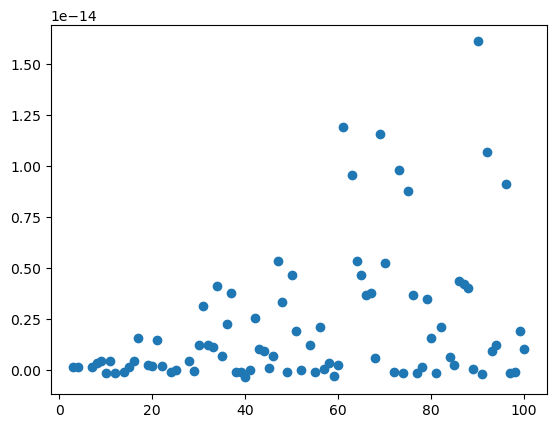

In [552]:
n_list = []
errors = []

for n in range(2, 101):
    example_3["n"] = n 
    try:
        x, c, h = galerkin(**example_3)
        n_list.append(n)
        errors.append(galerkin_error(u, c, h))
    except:
        continue

plt.scatter(n_list, errors)
plt.show()

In [553]:
errors

[1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 3.3306690738754696e-16,
 4.440892098500626e-16,
 -1.6653345369377348e-16,
 4.440892098500626e-16,
 -1.6653345369377348e-16,
 -1.3877787807814457e-16,
 1.1102230246251565e-16,
 4.440892098500626e-16,
 1.5543122344752192e-15,
 2.220446049250313e-16,
 1.6653345369377348e-16,
 1.4432899320127035e-15,
 1.942890293094024e-16,
 -1.1102230246251565e-16,
 0.0,
 4.440892098500626e-16,
 -5.551115123125783e-17,
 1.2212453270876722e-15,
 3.1086244689504383e-15,
 1.2212453270876722e-15,
 1.1102230246251565e-15,
 4.107825191113079e-15,
 6.661338147750939e-16,
 2.220446049250313e-15,
 3.774758283725532e-15,
 -1.3877787807814457e-16,
 -1.249000902703301e-16,
 -3.885780586188048e-16,
 -2.7755575615628914e-17,
 2.55351295663786e-15,
 9.992007221626409e-16,
 8.881784197001252e-16,
 5.551115123125783e-17,
 6.661338147750939e-16,
 5.329070518200751e-15,
 3.3306690738754696e-15,
 -9.71445146547012e-17,
 4.6629367034256575e-15,
 1.887

### Exemplo 4

In [554]:
def u(x):
    return x + (e**-x - e**x) / (e - e**-1)

x, c, h = galerkin(**example_4)

relative_error = galerkin_error(u, c, h)

print(f"Erro: {relative_error}")

Erro: -1.0771415215717409e-08


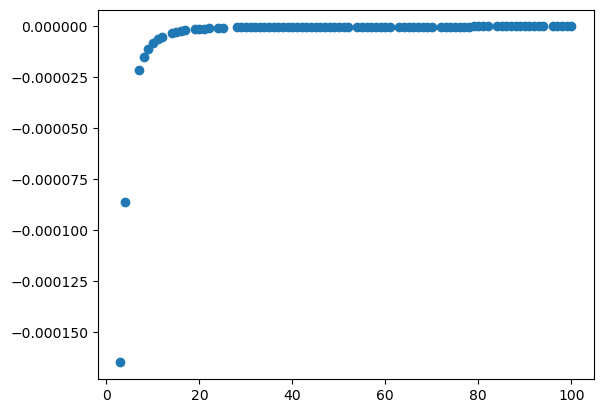

In [555]:
n_list = []
errors = []

for n in range(2, 101):
    example_4["n"] = n 
    try:
        x, c, h = galerkin(**example_4)
        n_list.append(n)
        errors.append(galerkin_error(u, c, h))
    except:
        continue

plt.scatter(n_list, errors)
plt.show()

In [556]:
errors

[-0.00016489881158654462,
 -8.60135948627036e-05,
 -2.141392426038835e-05,
 -1.5078584531435374e-05,
 -1.1012545030709281e-05,
 -8.28513734906465e-06,
 -6.38825074229625e-06,
 -5.028560798692877e-06,
 -3.2771640797978063e-06,
 -2.701430799906951e-06,
 -2.2529815466229564e-06,
 -1.898510594853034e-06,
 -1.3846446476175125e-06,
 -1.1963239082745172e-06,
 -1.0406543747105632e-06,
 -9.108571330631102e-07,
 -7.094332562318853e-07,
 -6.307426110721895e-07,
 -4.546486695768126e-07,
 -4.10707268444499e-07,
 -3.72250085761347e-07,
 -3.384476446035775e-07,
 -3.0861655848663655e-07,
 -2.8219037651391887e-07,
 -2.5869689100187915e-07,
 -2.3774034324172688e-07,
 -2.1898736417020476e-07,
 -2.021557972339827e-07,
 -1.8700575024318059e-07,
 -1.7333239053438088e-07,
 -1.6096010967223823e-07,
 -1.4973777400905525e-07,
 -1.3953483440475728e-07,
 -1.3023813007304735e-07,
 -1.2174924424917036e-07,
 -1.139823120662603e-07,
 -1.0686219088741275e-07,
 -1.0032293112482299e-07,
 -9.430648984128098e-08,
 -8.8761